# Astar dataset

The puprose of this dataset is to explore learning end to end the Astar algorithm from scratch.
This dataset provides the enviroment defined as a grid, where:
- 0 indicates free space, and 1 indicates obstacle.
- Not all enviroments have a solution.
- The solution is defined as a sequence of actions, where:
   0 -> up, 1 -> right, 2 -> down, 3 -> left
- The solution is given as a series of actions [0, 1, 0, 2]

## The input

The input is of the shape 3 x n x m, where:
- n: height of the grid for planning
- m: width of the grid for planning
- The 3 nxm grids are: 1. The grid representing the environment, 2. The one hot encoded vector representing the start, 3. The one hot encoded vector representing the goal

## The output
The output will be 5 classes:
- Move up (0)
- Move down (1)
- Move left (2)
- Move right (3)
- Do nothing (4) (no solution exists)
The problem can be treated as a classification problem, where each of the above actions can have a specific probability.


There are 2 problems that this dataset can help solve:
1. Whether a solution exits or not (completeness)
2. Finiding the optimal solution if it exists

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Set the grid size here
n, m = 10, 10  # grid size for the problem
N = 10000      # Number of examples

# Probability of existence of obstacle
obstacle_probability = 0.2

In [3]:
def createDataInstance(n, m, obstacle_p=0.2):
    x = np.empty((3, n, m))
    zero_positions = np.array([])
    while len(zero_positions) == 0:
        x[0, :, :] = np.random.choice([0, 1], size=(n, m), p=[1.0 - obstacle_p, obstacle_p])
        zero_positions = np.argwhere(x[0] == 0)

    x[1, :, :] = np.zeros(shape=(n,m))
    x[2, :, :] = np.zeros(shape=(n,m))

    index = zero_positions[np.random.choice(len(zero_positions))]
    x[1, index[0], index[1]] = 1 
    index = zero_positions[np.random.choice(len(zero_positions))]
    x[2, index[0], index[1]] = 1

    return x

In [29]:
import numpy as np
import heapq

def manhattan_distance(a, b):
    """Calculate Manhattan distance between two points."""
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    """
    A* pathfinding algorithm using Manhattan distance.
    
    Args:
        grid (np.ndarray): 2D numpy array, 0 for free cell, 1 for obstacle.
        start (tuple): Starting cell coordinates (row, col).
        goal (tuple): Goal cell coordinates (row, col).
    
    Returns:
        list of tuples: The path from start to goal, including both. Empty list if no path.
    """
    n, m = grid.shape
    visited = set()
    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan_distance(start, goal)}
    
    open_set = []
    heapq.heappush(open_set, (f_score[start], start))

    # Allowed motions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            # Reconstruct path
            path = [current]
            while current in came_from:
                current = came_from[current]
                path.append(current)
            path.reverse()
            return path

        visited.add(current)

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])

            if (0 <= neighbor[0] < n and 0 <= neighbor[1] < m and
                grid[neighbor] == 0 and neighbor not in visited):
                
                tentative_g_score = g_score[current] + 1

                if tentative_g_score < g_score.get(neighbor, float('inf')):
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = tentative_g_score + manhattan_distance(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []  # No path found


In [10]:
def plotX(x, path):
    # Plot the grid
    plt.imshow(x[0], cmap='RdYlGn', interpolation='nearest')


    for index in path:
        plt.scatter(index[1], index[0], color='white', s=100, label='Random Zero Position')


    # Plot the starting position
    start_index = np.argwhere(x[1] == 1)[0]
    plt.scatter(start_index[1], start_index[0], color='blue', s=100, label='Random Zero Position')
    goal_index = np.argwhere(x[2] == 1)[0]
    plt.scatter(goal_index[1], goal_index[0], color='yellow', s=100, label='Random Zero Position')
    

In [33]:
def get_direction(from_cell, to_cell):
    """
    Determine the direction of motion between two adjacent grid cells.

    Args:
        from_cell (tuple): Starting cell as (row, col)
        to_cell (tuple): Target cell as (row, col)

    Returns:
        str: One of 'up', 'down', 'left', 'right', or 'invalid'
    """
    dr = to_cell[0] - from_cell[0]
    dc = to_cell[1] - from_cell[1]

    if dr == -1 and dc == 0:
        return 0 # up
    elif dr == 1 and dc == 0:
        return 1 # down
    elif dr == 0 and dc == -1:
        return 2 # left
    elif dr == 0 and dc == 1:
        return 3 # right
    else:
        return 4


def createLabel(x):
    y = np.empty((5))
    path = astar(x[0], start, goal)

    if len(path) <= 1:
        y[4] = 1
        return y

    y[get_direction(path[0], path[1])] = 1
    return y
    

(np.int64(5), np.int64(5))
(np.int64(3), np.int64(1))
Path: [(np.int64(5), np.int64(5)), (np.int64(4), np.int64(5)), (np.int64(3), np.int64(5)), (np.int64(3), np.int64(4)), (np.int64(3), np.int64(3)), (np.int64(3), np.int64(2)), (np.int64(3), np.int64(1))]
[1.0e+000 3.0e-323 3.5e-323 4.0e-323 4.4e-323]


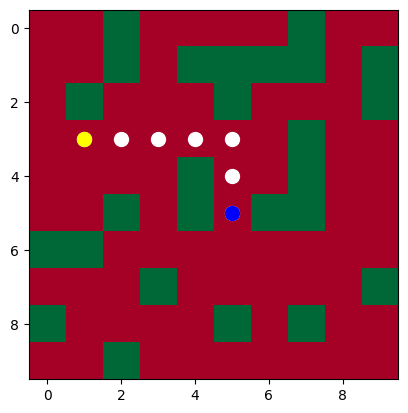

In [56]:
x = createDataInstance(n, m)

start = tuple(np.argwhere(x[1] == 1)[0])
goal = tuple(np.argwhere(x[2] == 1)[0])
print(start)
print(goal)
path = astar(x[0], start, goal)
print("Path:", path)
print(createLabel(x))
plotX(x, path)

In [59]:
def createDataset(N, n, m, obstacle_p=0.2):
    X = np.empty((N, 3, n, m))
    y = np.empty((N, 5))
    for i in range(N):
        x = createDataInstance(n, m, obstacle_p)
        X[i] = x
        y[i] = createLabel(x)
    return X, y

In [60]:
# Create the data set
start = time.time()
X, y = createDataset(N, n, m, obstacle_probability)
print(f"Execution time: {time.time() - start:.4f} seconds")

TypeError: 'float' object is not subscriptable

In [ ]:
x = createDataInstance(n, m, obstacle_probability)
print(x)
plotX(x)